# Predictive Maintenance Final Project 1

**OBJECTIVE:**
Develop a predictive maintenance system that can forecast potential failures in industrial equipment by analyzing historical equipment data. The goal is to predict future maintenance needs, thereby preempting equipment failures and reducing downtime.

**DATASET:**
The dataset consists of historical data related to equipment performance and maintenance. It includes the following features:
<br>**UDI:** Unique identifier for each record.
<br>**Product ID:** Identifier for the product.
<br>**Type:** Type of the product.
<br>**Air temperature [K]:** Air temperature in Kelvin.
<br>**Process temperature [K]:** Process temperature in Kelvin.
<br>**Rotational speed [rpm]:** Rotational speed in revolutions per minute.
<br>**Torque [Nm]:** Torque in Newton-meters.
<br>**Tool wear [min]:** Tool wear in minutes.
<br>**Target:** Binary indicator of failure (0 = No Failure, 1 = Failure).
<br>**Failure Type:** Type of failure (e.g., No Failure, Heat Dissipation Failure).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/hitha sunil/Documents/Data Set/predictive_maintenance.csv")
data['Failure Type'] = data['Failure Type'].apply(lambda x: 0 if x == 'No Failure' else 1)
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type  
0                    1551         42.8                0       0             0  
1                    1408         46.3                3       0             0  
2                    1498         49.4                5       0             0  
3                    1433         39.5                7       0             0  
4                    1408         40.0                9       0             0

In [3]:
data.shape

(10000, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 781.4+ KB


In [5]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   2
dtype: int64

In [7]:
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                 int64
dtype: object

**UNIVARIATE ANALYSIS**

<br>Histograms with KDE plots are used to visualize the distribution of each numerical feature.
<br>Count plots are used to visualize the distribution of categorical features.
<br>Separate plots for the target variable and failure type to show their distributions.

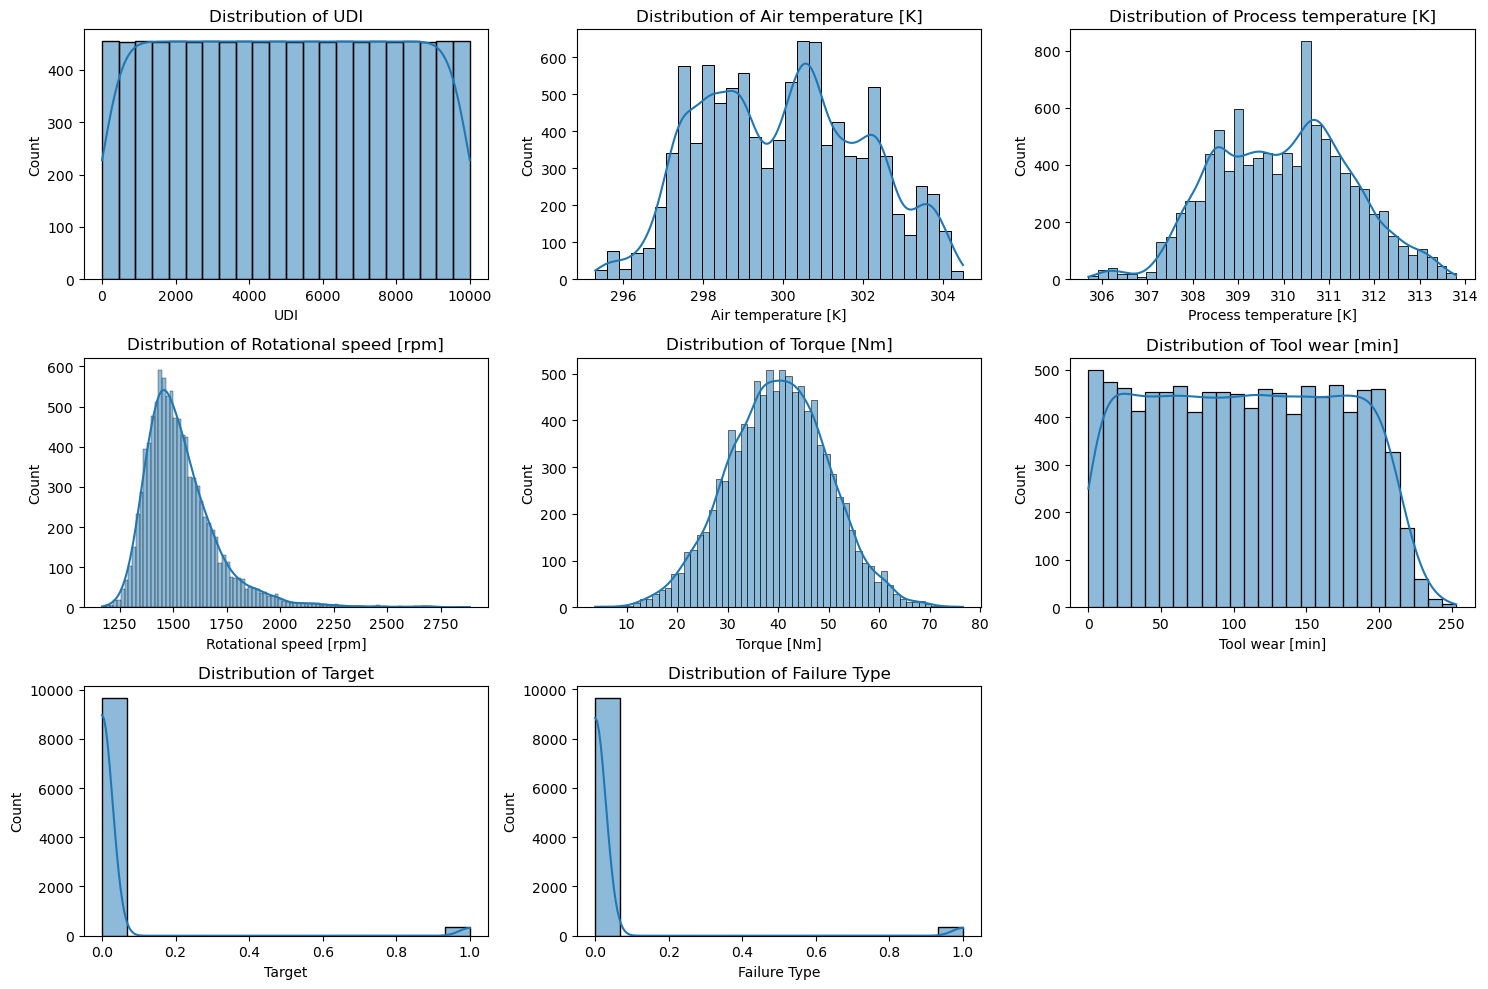

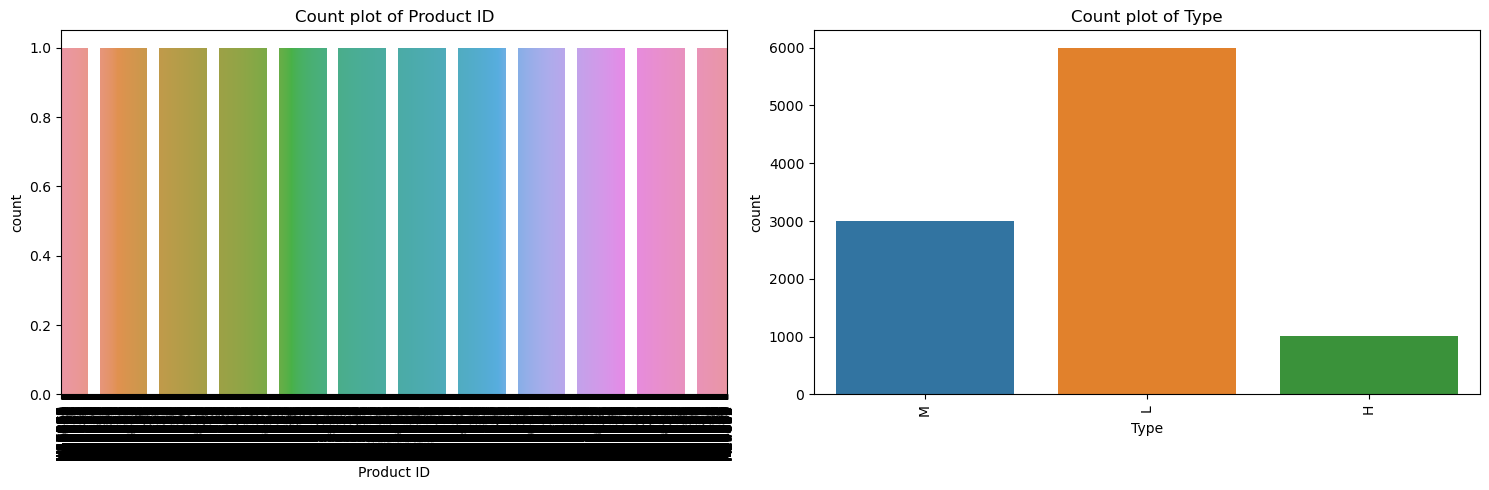

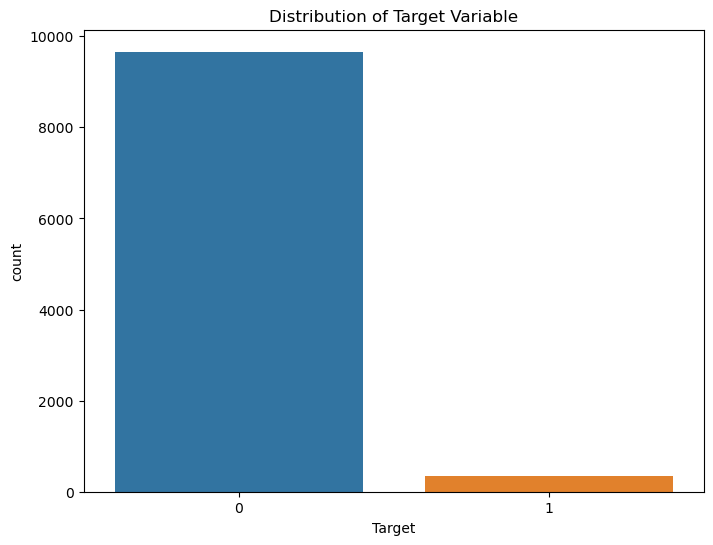

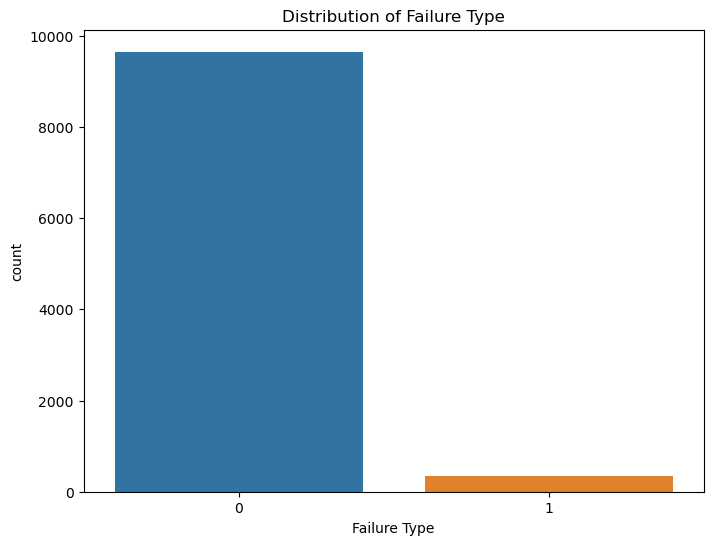

In [8]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Count plots for categorical features (if any)
cat_cols = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(x=data[col])
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyze the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

# Analyze the Failure Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', data=data)
plt.title('Distribution of Failure Type')
plt.show()

**BIVARIATE ANALYSIS**

<br>Box plots to show the relationship between each numerical feature and the target variable.
<br>Box plots to show the relationship between each numerical feature and the failure type.
<br>Correlation matrix heatmap to show the correlation between numerical features.

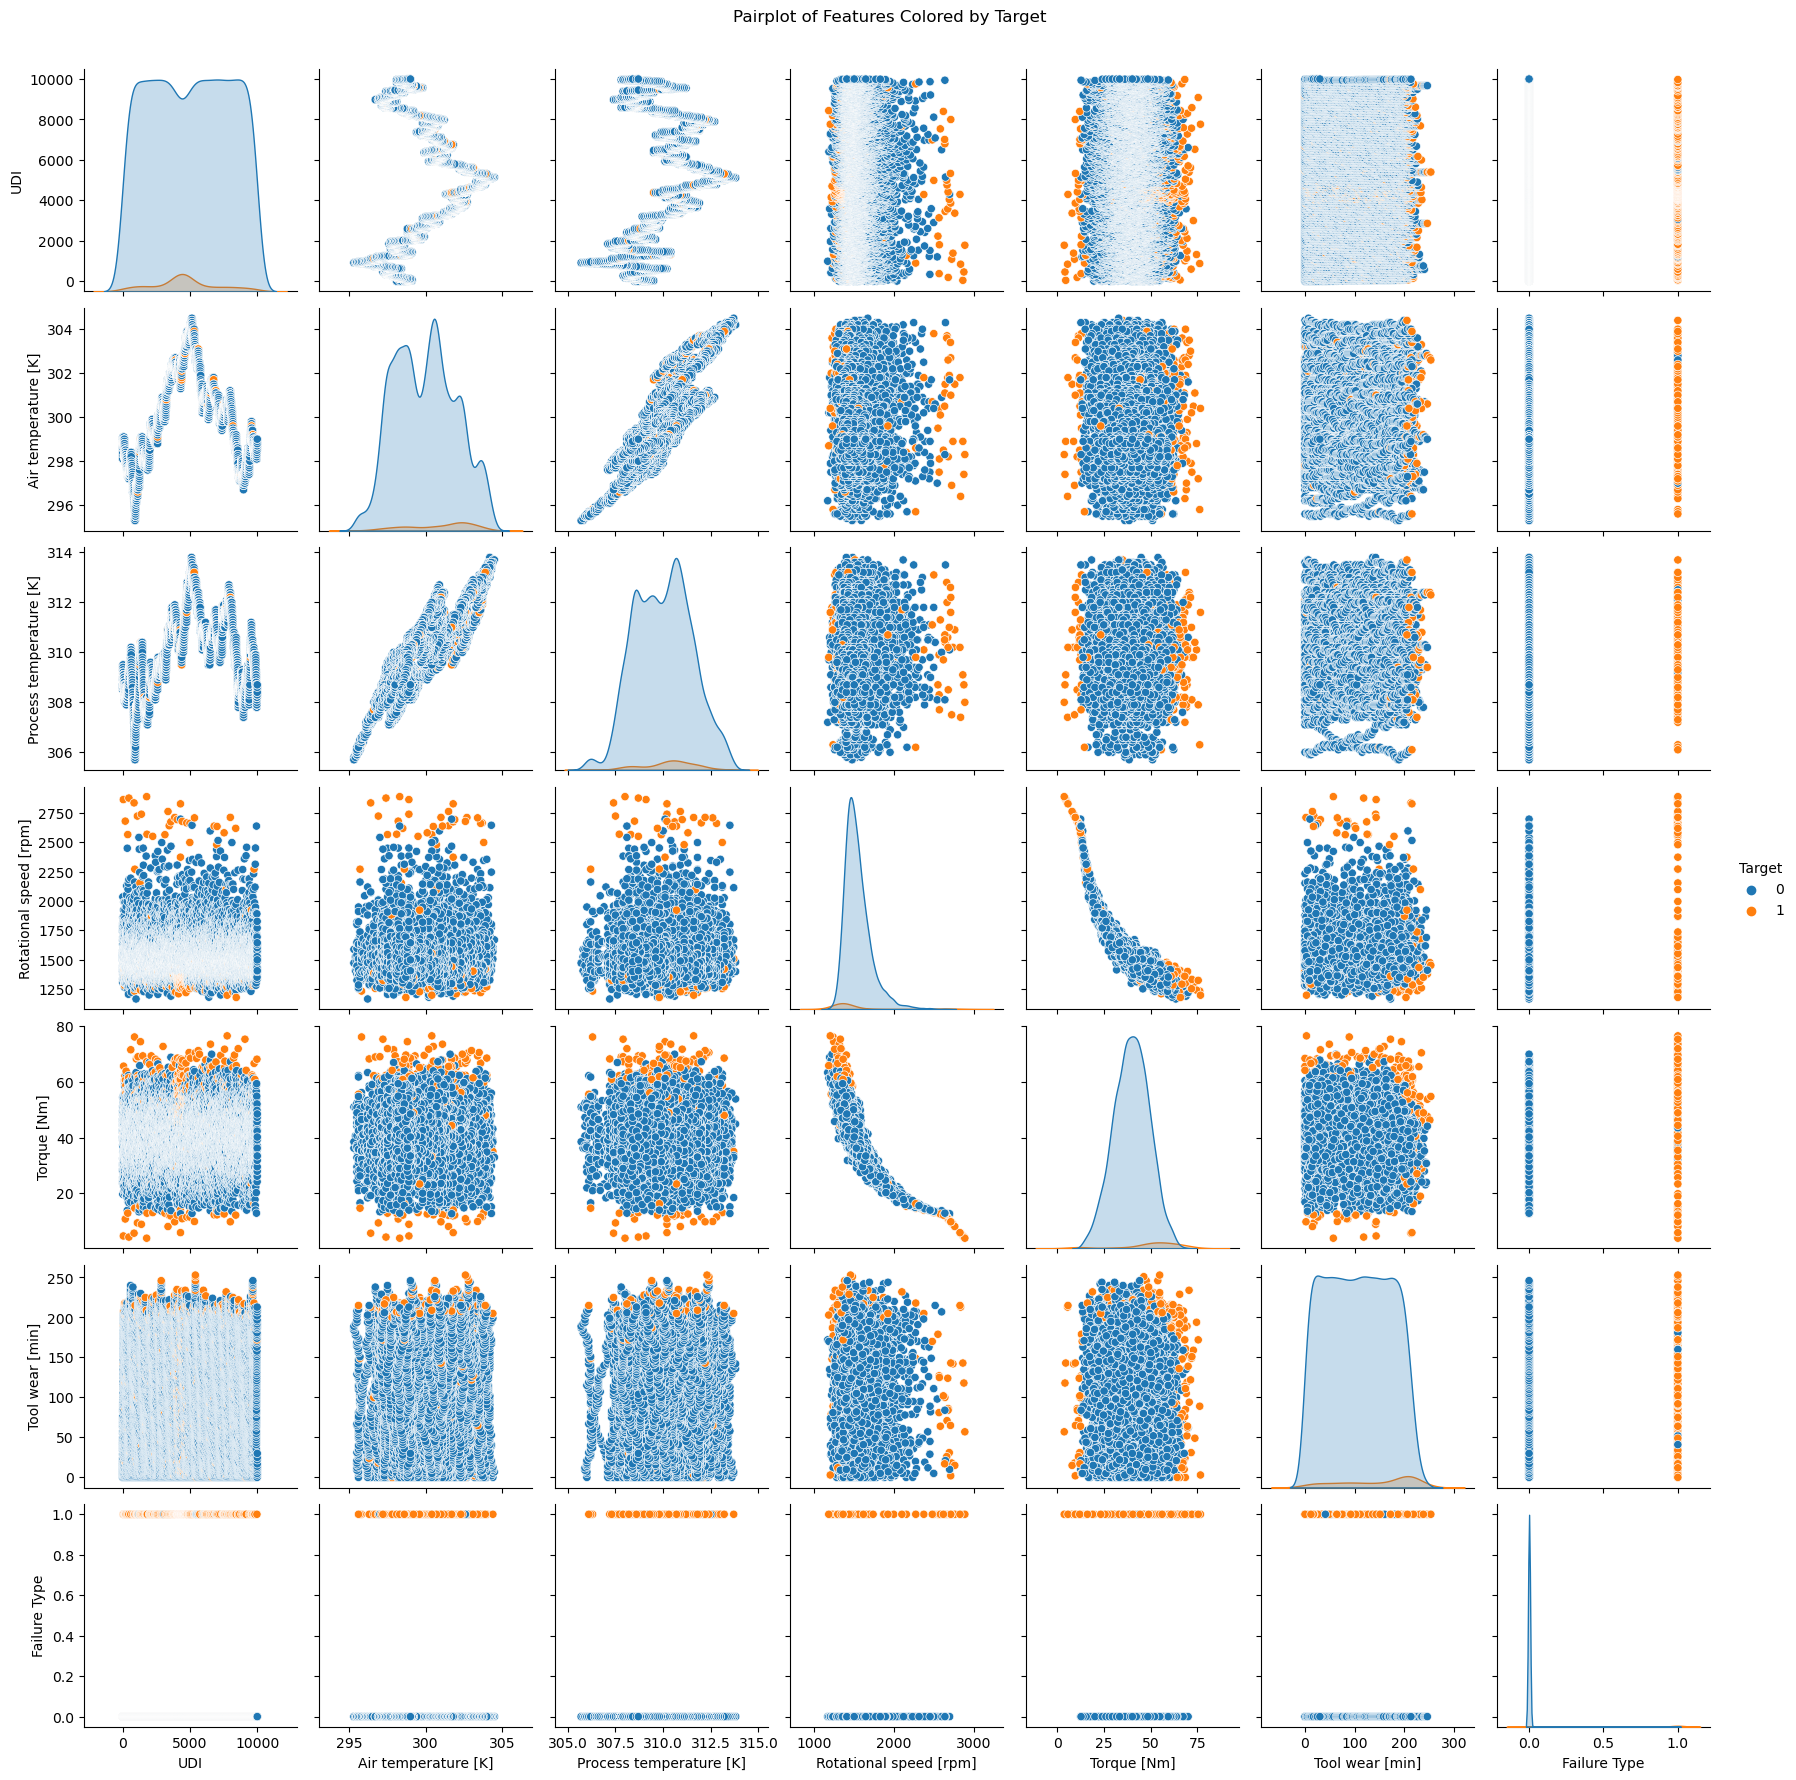

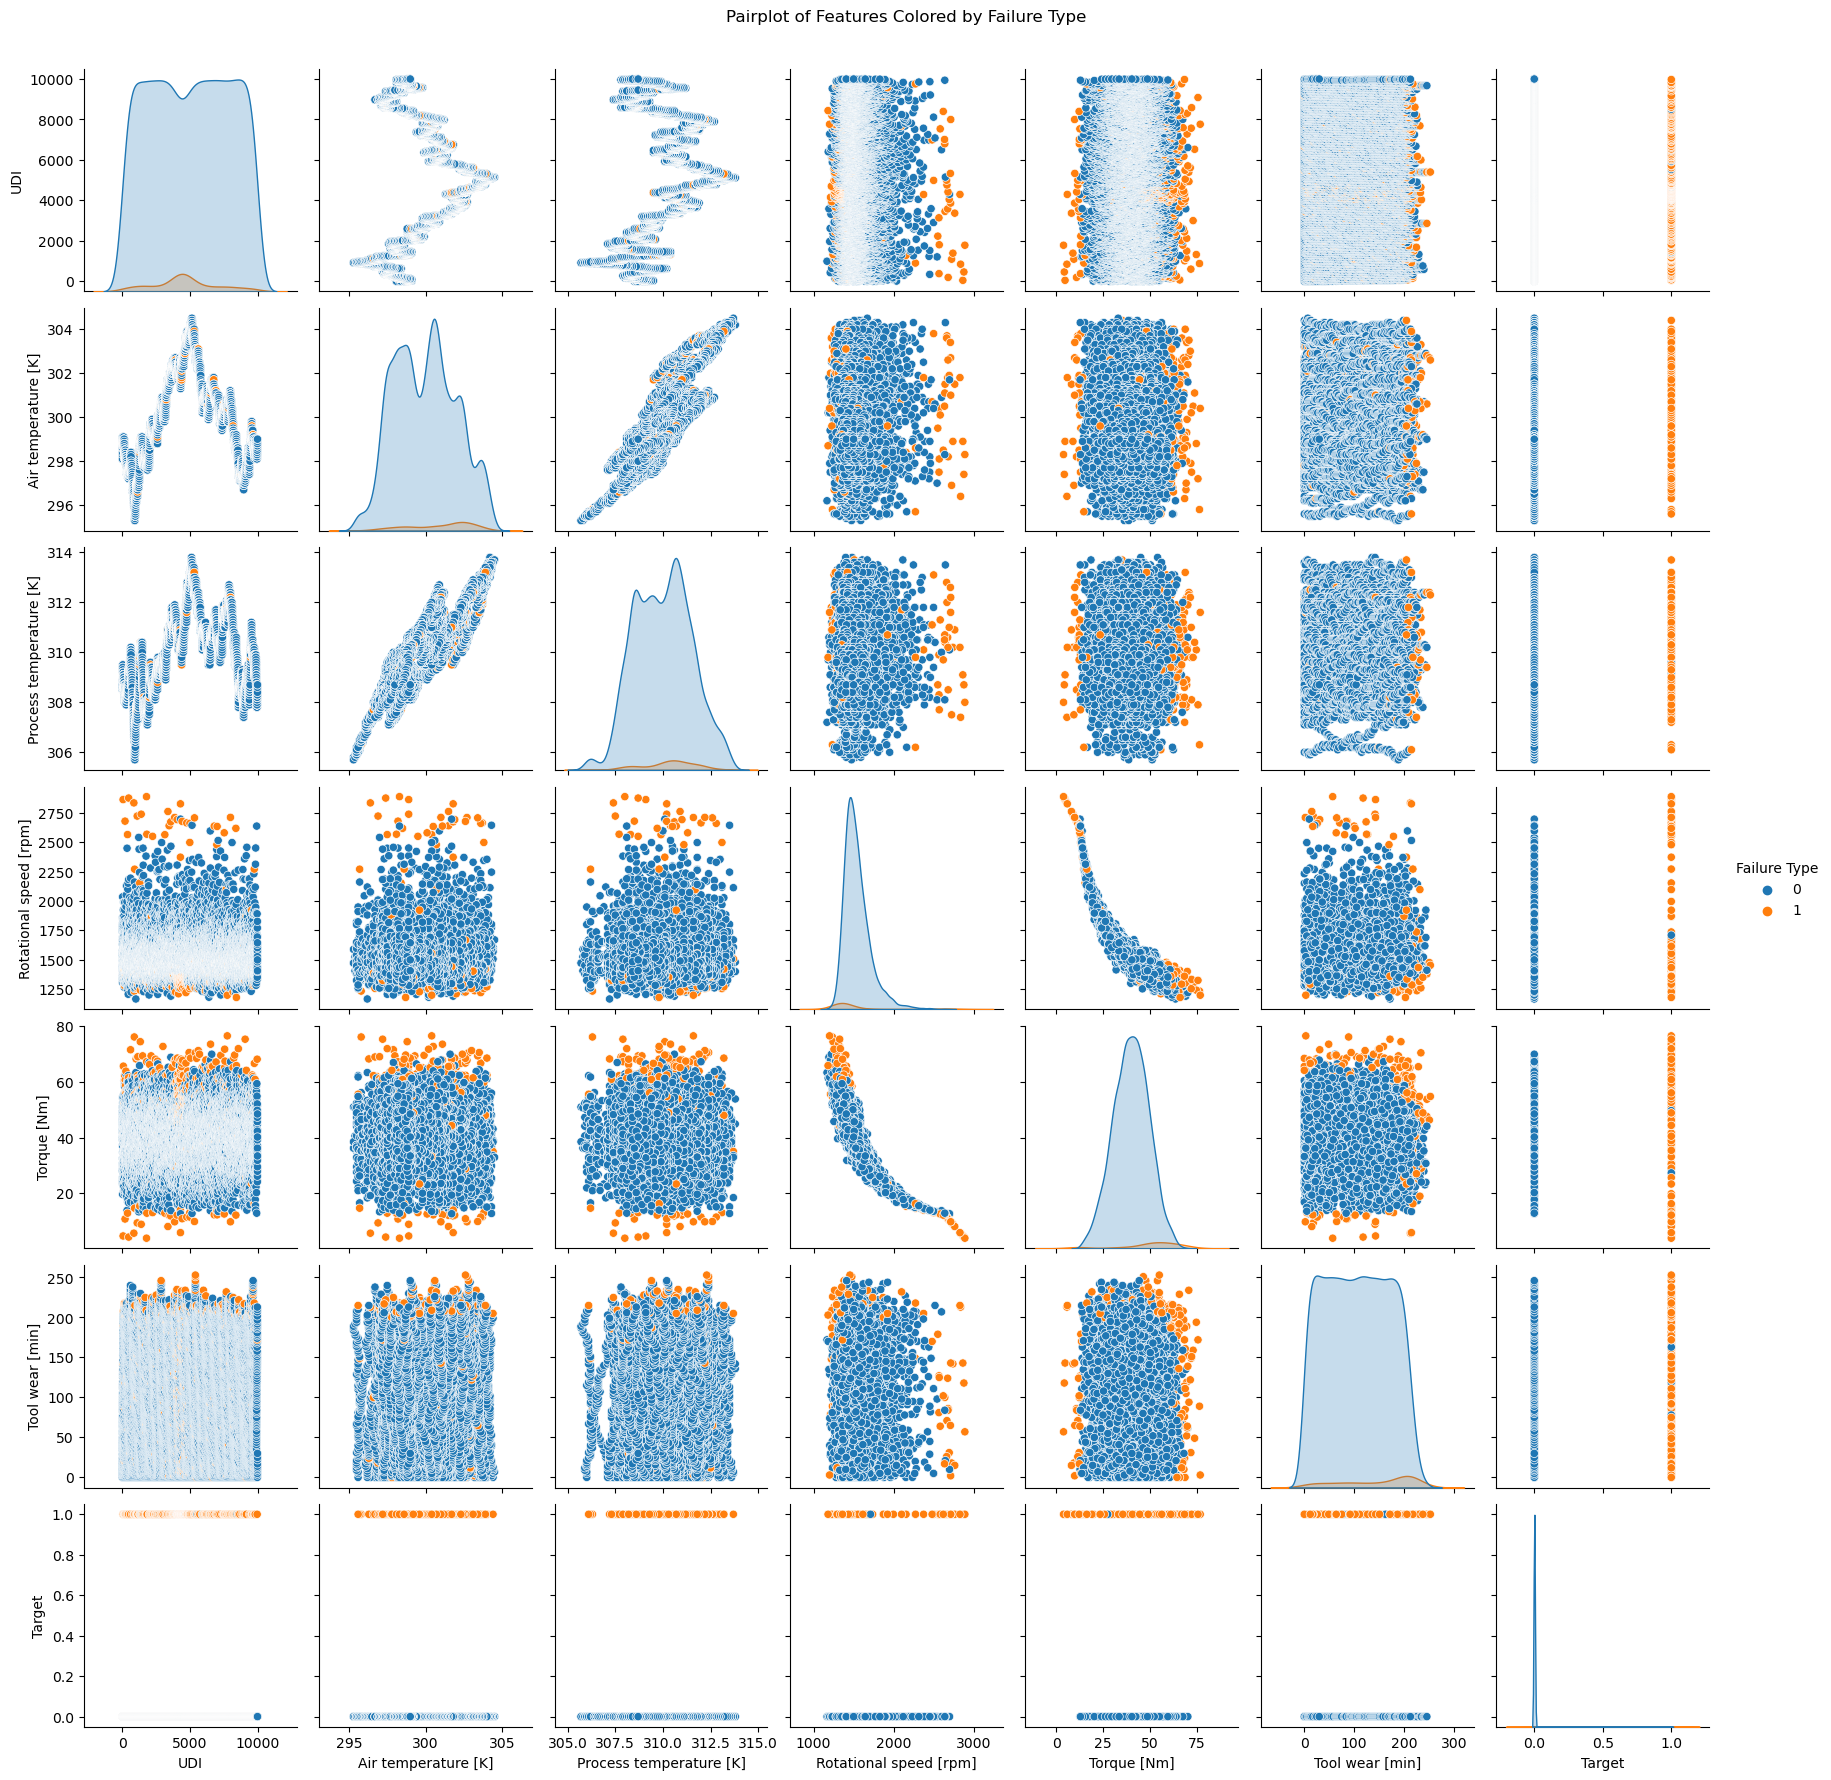

In [9]:
# Multivariate Analysis: Pairplot to visualize relationships between multiple numerical features and target variable
sns.pairplot(data, hue='Target', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by Target', y=1.02)
plt.show()

# Multivariate Analysis: Pairplot to visualize relationships between multiple numerical features and failure type
sns.pairplot(data, hue='Failure Type', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by Failure Type', y=1.02)
plt.show()

**MULTIVARIATE ANALYSIS**
<br>Multivariate analysis involves examining the relationships between multiple variables simultaneously.

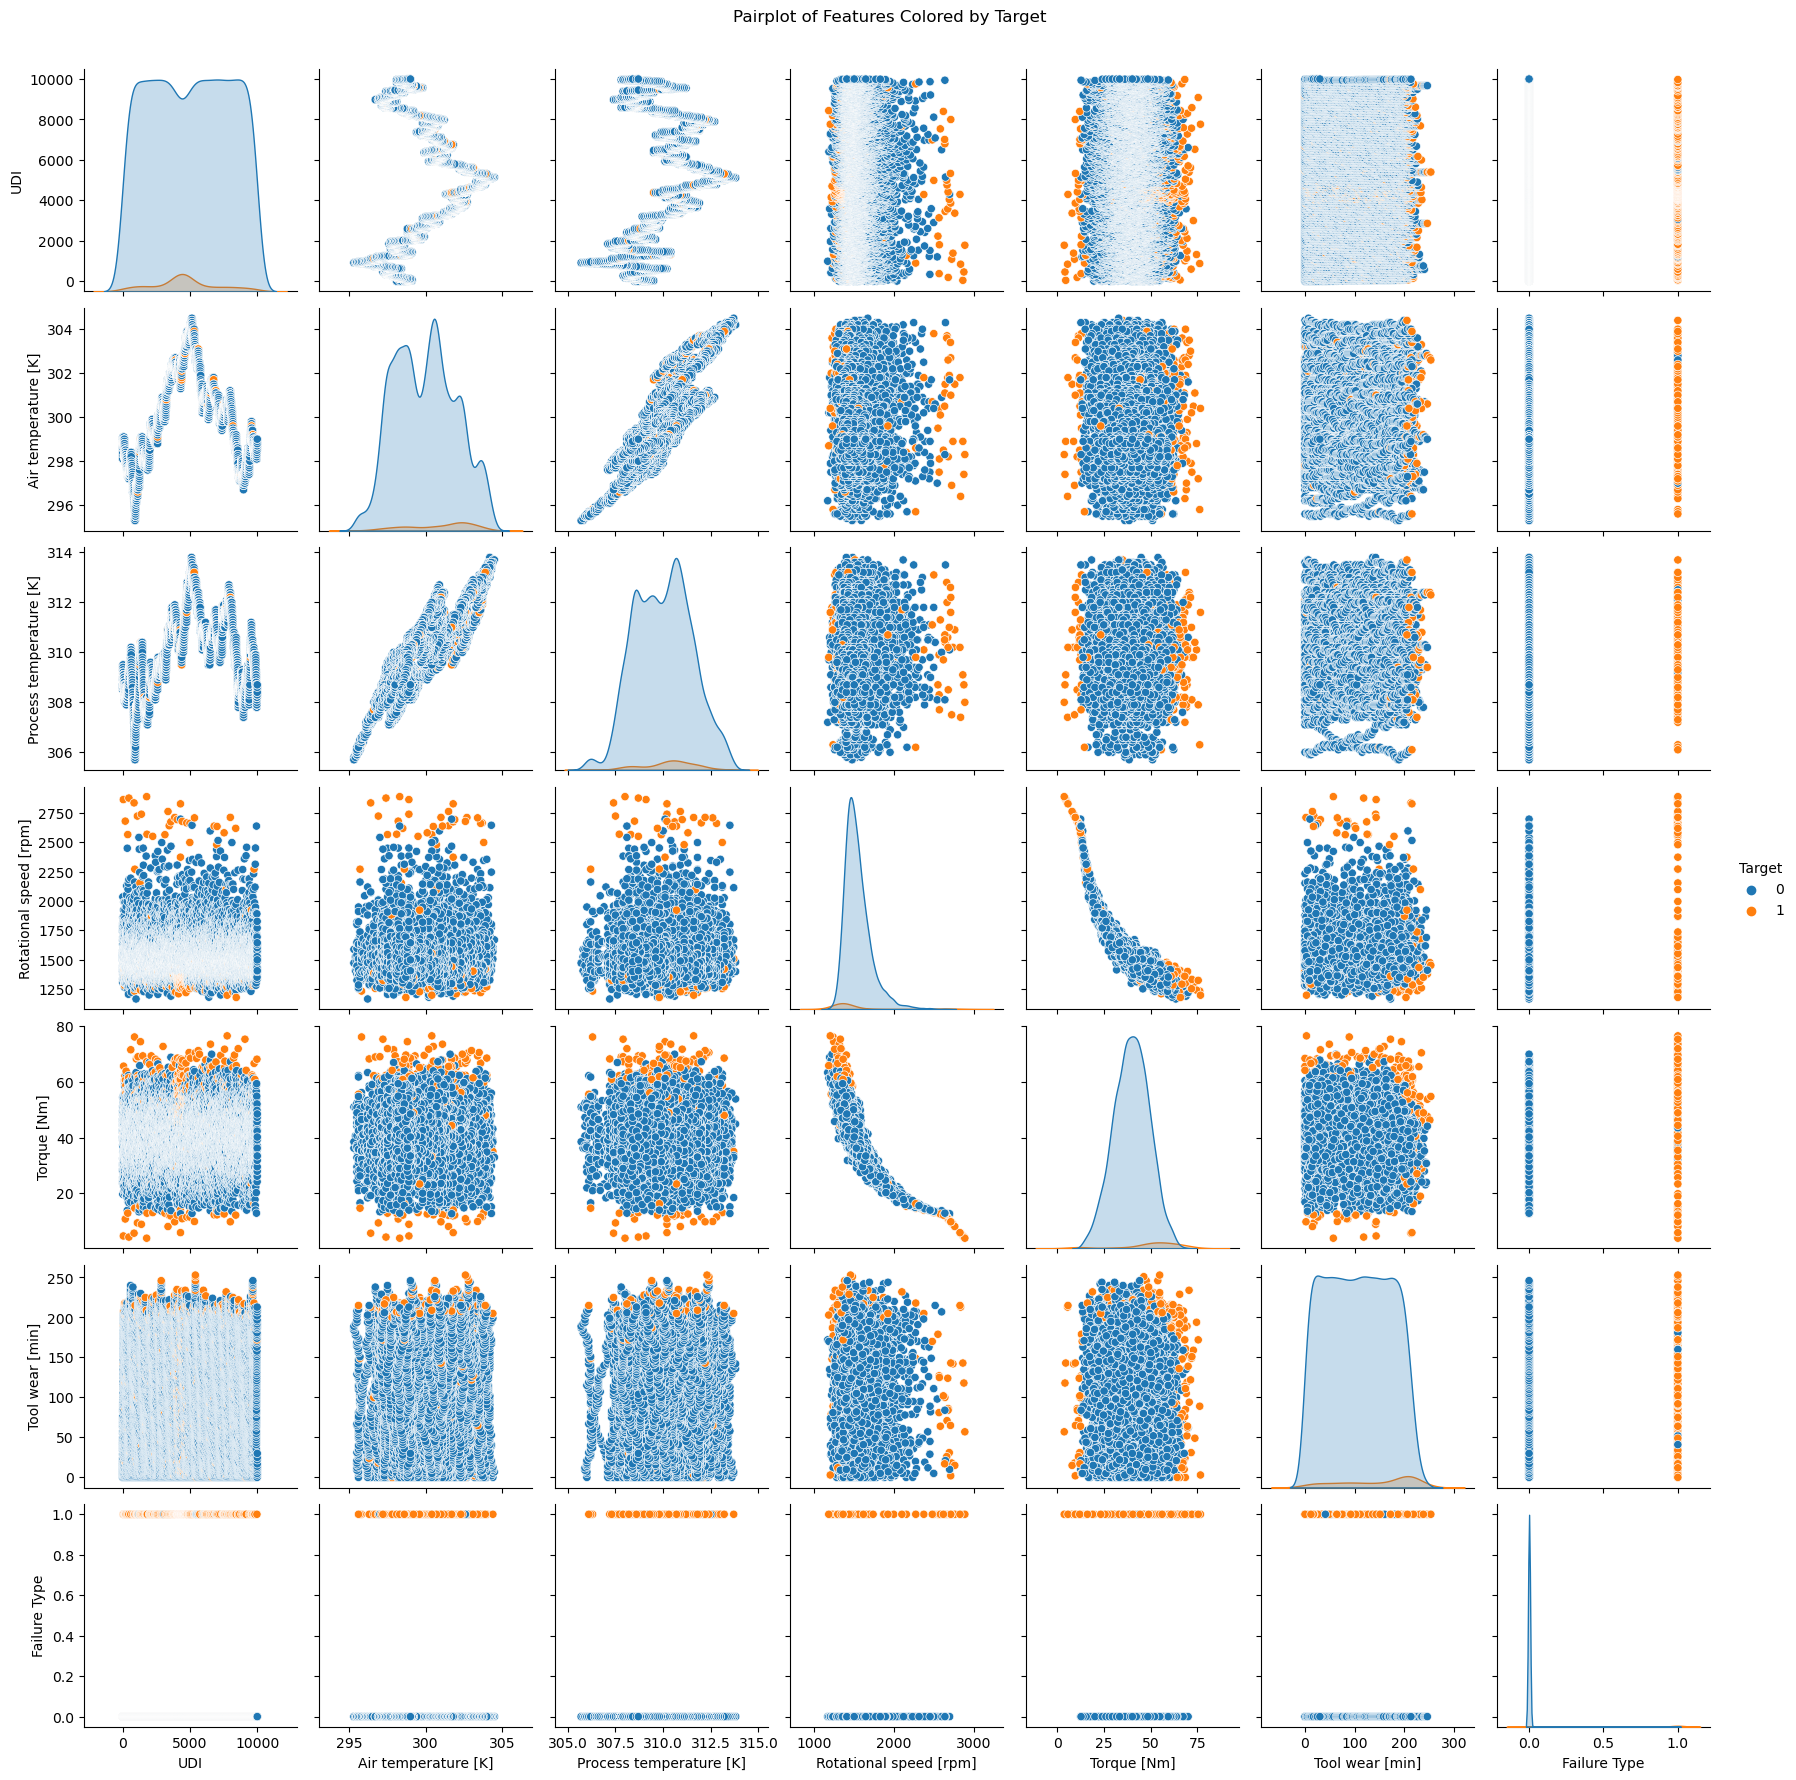

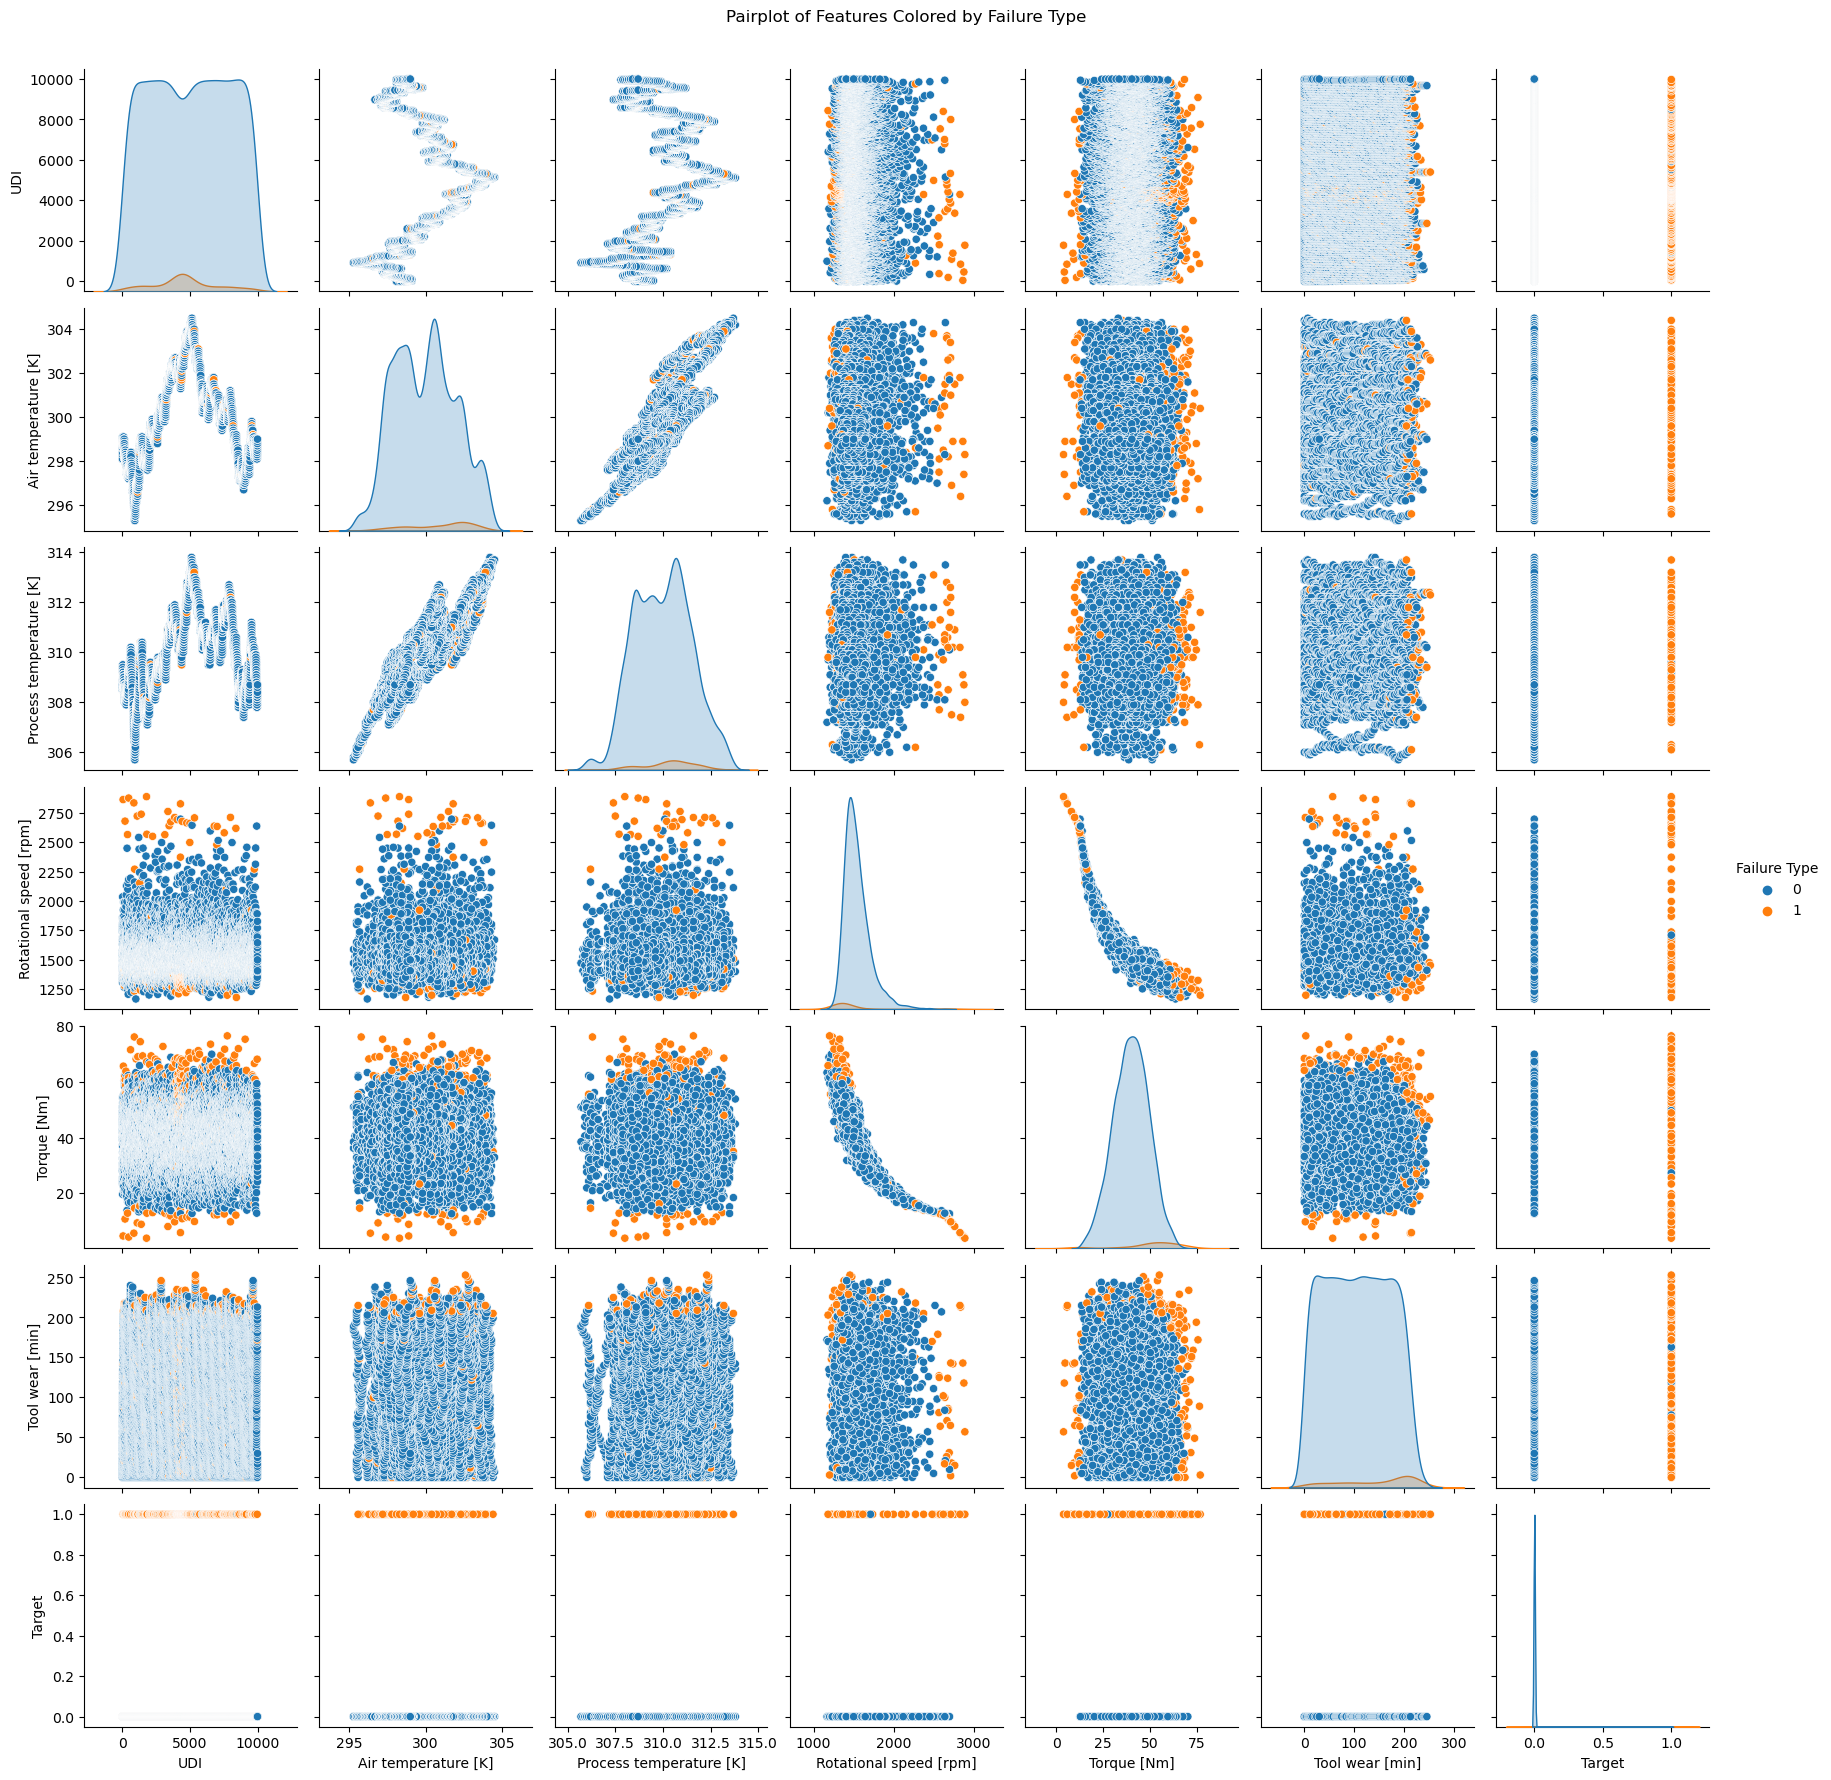

In [10]:
sns.pairplot(data, hue='Target', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by Target', y=1.02)
plt.show()

# Multivariate Analysis: Pairplot to visualize relationships between multiple numerical features and failure type
sns.pairplot(data, hue='Failure Type', diag_kind='kde')
plt.suptitle('Pairplot of Features Colored by Failure Type', y=1.02)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convert categorical columns to numerical values
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])
data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])

# Separate features and target
X = data.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type'])
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the preprocessed data
print("First 5 rows of preprocessed training data:")
print(X_train[:5])
print("First 5 rows of training labels:")
print(y_train[:5])


First 5 rows of preprocessed training data:
[[-0.33656929 -0.85406604 -0.60958879  0.42763418 -0.89269644  1.37503539]
 [-0.33656929 -0.90401361 -1.08052803 -0.83494457  1.38218727  0.45762016]
 [-0.33656929 -0.90401361 -1.48419023 -0.05967692 -0.89269644  1.35921788]
 [ 1.32550129  0.44457086  0.53412078  0.33349453 -0.70228767 -1.59865535]
 [-0.33656929  0.69430873  0.33228968  0.178441   -0.61209404  1.58066294]]
First 5 rows of training labels:
9254    0
1561    0
1670    0
6087    0
6669    0
Name: Target, dtype: int64


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-validation accuracy scores: [0.988125 0.98     0.983125 0.981875 0.9825  ]
Mean cross-validation accuracy: 0.983125
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
[[1932    7]
 [  25   36]]


### Conclusion (Short)

The Random Forest Classifier shows high overall accuracy (98.3%) but struggles with detecting failures due to class imbalance:

- **Accuracy**: 98.3%
- **Precision**: 
  - No Failure (0): 0.99
  - Failure (1): 0.84
- **Recall**:
  - No Failure (0): 1.00
  - Failure (1): 0.59
- **F1-Score**:
  - No Failure (0): 0.99
  - Failure (1): 0.69

**Confusion Matrix**:
- True Negatives: 1932
- False Positives: 7
- False Negatives: 25
- True Positives: 36

**Key Points**:
- **High Accuracy**: Excellent at detecting no failures.
- **Low Recall for Failures**: Misses many actual failures.
- **Class Imbalance**: Needs addressing, possibly with techniques like SMOTE.

**Recommendations**:
- Balance the dataset.
- Adjust class weights or thresholds.
- Consider further model tuning and feature engineering.

The model shows high accuracy, with very few false positives and negatives. The precision and recall for the minority class (1) are lower, indicating some difficulty in predicting failures accurately.

To further improve the model, consider:
1. **Balancing the dataset**: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.
2. **Feature Engineering**: Create new features that might help the model better understand the data.
3. **Hyperparameter Tuning**: Use Grid Search or Random Search to find the best hyperparameters for the Random Forest model.

Here's how you can implement SMOTE and re-evaluate the model:


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning with Grid Search
param_grid = {
  'n_estimators': [100, 200],
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 5],
  'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_balanced, y_train_balanced)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Best Model Classification Report:")
print(classification_rep)

print("Best Model Confusion Matrix:")
print(confusion_mat)


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1939
           1       0.48      0.70      0.57        61

    accuracy                           0.97      2000
   macro avg       0.73      0.84      0.78      2000
weighted avg       0.97      0.97      0.97      2000

Best Model Confusion Matrix:
[[1892   47]
 [  18   43]]


### Conclusion (Best Model)

The optimized Random Forest Classifier shows an overall accuracy of 97% with improved performance in detecting failures:

- **Accuracy**: 97%
- **Precision**:
  - No Failure (0): 0.99
  - Failure (1): 0.48
- **Recall**:
  - No Failure (0): 0.98
  - Failure (1): 0.70
- **F1-Score**:
  - No Failure (0): 0.98
  - Failure (1): 0.57

**Confusion Matrix**:
- True Negatives: 1892
- False Positives: 47
- False Negatives: 18
- True Positives: 43

**Key Points**:
- **High Accuracy**: Maintains high accuracy at 97%.
- **Improved Recall for Failures**: Better at detecting failures (recall increased to 0.70).
- **Precision for Failures**: Precision for detecting failures is lower (0.48).

**Recommendations**:
- **False Positives**: Acceptable increase, given improved recall.
- **Further Improvement**: Continue balancing the dataset, tuning hyperparameters, and feature engineering for better precision in detecting failures.

Overall, the optimized model strikes a better balance between detecting failures and maintaining high overall accuracy.